In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv,os,re
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
import gensim
import textblob
import sklearn
import numpy as np

C:\Users\Mudit\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:

df = pd.read_csv('lyrics.csv')

In [26]:
df.columns


Index(['song', 'artist', 'genre', 'lyrics', 'Unique_Word_Count',
       'Sentiment Polarity'],
      dtype='object')

In [6]:
#Drop index column and all rows with Nan values and no lyrics
#Drop year column- has incorrect values ?
df = df.drop(['index'],axis = 1)
df = df.drop(['year'],axis = 1)
df.dropna(axis = 0,inplace = True)
df = df[df['lyrics'].map(lambda x: len(x) > 30)]

In [7]:

#Remove non-English songs from the dataset
stop_words = set(stopwords.words('english'))
stop_words_subset = set([x for x in stop_words if 3 <= len(x) <= 5])
#sample_song_lyrics = df.iloc[53]['lyrics'].split(' ')
#print(sum(x in words.words() for x in sample_song_lyrics))
print(f'Size of dataset before: {len(df)}')
#df = df[df['lyrics'].map(lambda x: sum(y in x.split(' ') for y in stop_words_subset) > 0)]
#Taking too long to run

Size of dataset before: 261780


In [6]:
#TODO: Filter out non-English songs
#How to incorporate meta-data present in songs like Chorus Bridge etc?


In [7]:
old_songs = df[df['artist'] == 'beatles']

In [8]:
#df.head(50)
meta_data = df[df['lyrics'].map(lambda x: any(t in x for t in ['Chorus','Bridge','Intro','Hook','Verse']))]

In [9]:
meta_data

,song,artist,genre,lyrics
2,honesty,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
8,slow-love,beyonce-knowles,Pop,[Verse 1:]\nI read all of the magazines\nwhile...
16,poison,beyonce-knowles,Pop,You're bad for me I clearly get it\nI don't se...
17,world-wide-women,beyonce-knowles,Pop,[Chorus:]\nI'm a world wide woman WWW you can ...
21,bienvenue,beyonce-knowles,Pop,Beyonc - Intro:\nBeyonce\nIAM\nWelcome\nWelcom...
27,my-man,beyonce-knowles,Pop,you say that he's wrong\nyou say that he's no ...
28,what-s-it-gonna-be,beyonce-knowles,Pop,"1st verse:\nhey you what's the deal, its poppi..."
30,a-girl-with-no-name,beyonce-knowles,Pop,You don't care about me at all\nYou treat me l...
34,i-can-t-take-no-more,beyonce-knowles,Pop,Verse 1:\nIt's really been weighing on me\nTel...


In [10]:
len(meta_data)

26802

In [11]:
len(df)/len(df['artist'].value_counts())
#Average of 18 songs per artist - leaves artist wise lyrical analysis possible

18.023960341503717

In [12]:
#Adding a unique word count column to the dataset
word_count = [len(set(df.iloc[ind]['lyrics'].split(' '))) for ind in range(0,len(df))]
df['Unique_Word_Count'] = word_count

In [31]:
#new_df = pd.DataFrame(old_songs)

In [13]:
df.head(50)

,song,artist,genre,lyrics,Unique_Word_Count
0,ego-remix,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",152
1,then-tell-me,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",134
2,honesty,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,89
3,you-are-my-rock,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",139
4,black-culture,beyonce-knowles,Pop,"Party the people, the people the party it's po...",66
5,all-i-could-do-was-cry,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...,59
6,once-in-a-lifetime,beyonce-knowles,Pop,This is just another day that I would spend\nW...,108
7,waiting,beyonce-knowles,Pop,"Waiting, waiting, waiting, waiting\nWaiting, w...",124
8,slow-love,beyonce-knowles,Pop,[Verse 1:]\nI read all of the magazines\nwhile...,139
9,why-don-t-you-love-me,beyonce-knowles,Pop,"N-n-now, honey\nYou better sit down and look a...",119


PRELIMINARY DATA ANALYSIS AND VISUALIZATION

In [14]:
#Group word_count data by genre, artist to see if any patterns emerge
genre_word_count_group = df['Unique_Word_Count'].groupby(df['genre'])
artist_word_count_group = df['Unique_Word_Count'].groupby(df['artist'])

In [15]:
#dir(genre_word_count_group)
#for group in genre_word_count_group:
 #   print(group.describe())
genre_descript_df = genre_word_count_group.describe()
artist_descript_df = artist_word_count_group.describe()


In [17]:
genre_wordcount_mean = {genre:mean_count for genre,mean_count in zip(genre_descript_df.index,genre_descript_df['mean'])}
artist_wordcount_mean = {artist:mean_count for artist,mean_count in zip(artist_descript_df.index,artist_descript_df['mean'])}


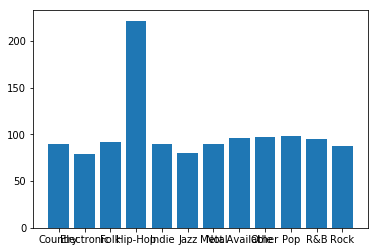

In [18]:
#plt.bar(range(len(D)), list(D.values()), align='center')
#plt.xticks(range(len(D)), list(D.keys()))
plt.bar(range(len(genre_wordcount_mean)),list(genre_wordcount_mean.values()),align = 'center')
plt.xticks(range(len(genre_wordcount_mean)),list(genre_wordcount_mean.keys()))
plt.show()

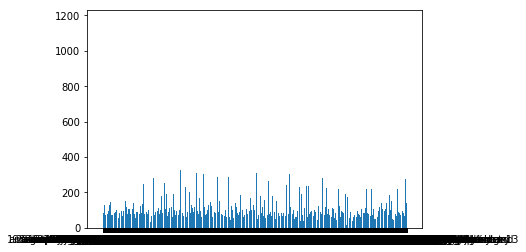

In [19]:
plt.bar(range(len(artist_wordcount_mean)),list(artist_wordcount_mean.values()),align = 'center')
plt.xticks(range(len(artist_wordcount_mean)),list(artist_wordcount_mean.keys()))
plt.show()

In [20]:
df['genre'].value_counts()

Rock             107412
Pop               40230
Hip-Hop           24744
Not Available     23113
Metal             22829
Country           14316
Jazz               7821
Electronic         7559
Other              5160
R&B                3388
Indie              3102
Folk               2106
Name: genre, dtype: int64

In [21]:
genre_artist_group = df['artist'].groupby(df['genre'])
data = genre_artist_group.describe()

In [22]:
data

,count,unique,top,freq
genre,,,,
Country,14316,370,dolly-parton,744
Electronic,7559,835,bjrthrk,221
Folk,2106,158,clannad,151
Hip-Hop,24744,1103,chris-brown,627
Indie,3102,294,devendra-banhart,138
Jazz,7821,334,ella-fitzgerald,571
Metal,22829,996,fall,367
Not Available,23113,2752,andrea-bocelli,298
Other,5160,1680,cenk-r-lr-etin,137


In [23]:
from textblob import TextBlob
sentiment_polarity = []
df['Sentiment Polarity'] = df['lyrics'].map(lambda x: TextBlob(x).sentiment.polarity)

In [113]:
#Analysing the different genres on basis of sentiment polarity of the lyrics
genre_sentiment_group = df['Sentiment Polarity'].groupby(df['genre'])
gs_data = genre_sentiment_group.describe()

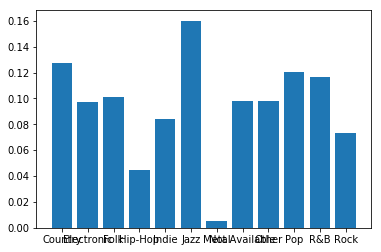

In [115]:
genre_mean_sentiment = {genre:mean_sent for genre,mean_sent in zip(gs_data.index,gs_data['mean'])}
plt.bar(range(len(genre_mean_sentiment)),list(genre_mean_sentiment.values()),align = 'center')
plt.xticks(range(len(genre_mean_sentiment)),list(genre_mean_sentiment.keys()))
plt.show()

In [100]:
#A useful form of clustering of songs is the topics present in a song. As songs can be described along themes of happiness,
#sadness,romance etc, we can use topic modeling to extract more information about our dataset

#Methods to perform topic modeling: LDA, Explicit Semantic Analysis, Non Negative Matrix Factorization


In [174]:
#Using sklearn's LabelBinarizer to get one-hot encoding of the genre attribute
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder
encoder = LabelBinarizer()
one_hot_encoder = OneHotEncoder(sparse = False)

one_hot_encoding = encoder.fit_transform(df['genre'])
#Gives a (261780,12) shaped numpy array

In [178]:
df['Genre_Encoded'] = list(one_hot_encoding)
df['Genre_Encoded'] = df['Genre_Encoded'].map(lambda x: x.astype('float64'))

In [184]:
#Building an SVM Classifier
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,test_size = 0.25)

In [185]:
df_train_genre = df_train['Genre_Encoded']
df_test_genre = df_test['Genre_Encoded']
df_train_num = df_train.filter(items = ['Unique_Word_Count','Sentiment Polarity'])
df_test_num = df_test.filter(items = ['Unique_Word_Count','Sentiment Polarity'])
#df_train_nolyrics = df_train.copy().drop(columns=['lyrics'])
#df_test_nolyrics = df_test.copy().drop(columns = ['lyrics'])


In [217]:
from sklearn.svm import LinearSVC
svm_classifier = LinearSVC()
svm_classifier.fit(df_train_num,df_train_genre)
#df_train_genre.iloc[0].shape

ValueError: Unknown label type: 'unknown'

In [219]:
df_train_genre.head(5)

157277    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
90109     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
106224    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
221087    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
247082    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: Genre_Encoded, dtype: object

In [57]:
#Do certain word embeddings capture stylistic information such as repetitions, 'rhythm of words' etc ?
from gensim.models import Word2Vec
dylan = df[(df['artist'] == 'bob-dylan')].copy()
beatles = df[(df['artist'] == 'beatles')].copy()


In [60]:
#dylan_corpus = list(dylan['lyrics'])
#dylan_corpus = [x.strip('\n') for x in dylan_corpus ]
dylan['lyrics'] = dylan['lyrics'].map(lambda x: re.sub('\n','. ',x))
beatles['lyrics'] = beatles['lyrics'].map(lambda x: re.sub('\n','. ',x))

In [64]:
dylan_corpus = (list(dylan['lyrics']))
beatles_corpus = (list(beatles['lyrics']))


In [65]:
dylan_vector = Word2Vec(dylan_corpus,size = 100, min_count = 5)

In [67]:
beatles_vector = Word2Vec(beatles_corpus,size = 100, min_count = 5)

In [73]:
def get_song_average(sentence,model):
    word_arrays = []
    for word in sentence:
        try:
            word_vector = model[word]
            #word_vector = word_vector.reshape(1,100)
            word_arrays.append(word_vector)
        except KeyError:
            pass
        res = np.mean(word_arrays,axis=0)
        #res = res.reshape(1,100)
    return res

In [83]:
b1 = get_song_average(beatles.iloc[0]['lyrics'],beatles_vector).reshape(1,-1)
b2 = get_song_average(beatles.iloc[10]['lyrics'],beatles_vector).reshape(1,-1)

C:\Users\Mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [84]:
d1 = get_song_average(dylan.iloc[0]['lyrics'],dylan_vector).reshape(1,-1)
d2 = get_song_average(dylan.iloc[10]['lyrics'],dylan_vector).reshape(1,-1)

C:\Users\Mudit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

In [85]:
cosine_similarity(b1,d1)


array([[0.5542706]], dtype=float32)

In [86]:
cosine_similarity(b1,b2)

array([[0.98612154]], dtype=float32)

In [87]:
cosine_similarity(d1,d2)

array([[0.9841837]], dtype=float32)

In [2]:
#Average similarity measure for the two selected artists:
len(dylan)

NameError: name 'dylan' is not defined

In [24]:
df['genre'].value_counts()

Rock             107412
Pop               40230
Hip-Hop           24744
Not Available     23113
Metal             22829
Country           14316
Jazz               7821
Electronic         7559
Other              5160
R&B                3388
Indie              3102
Folk               2106
Name: genre, dtype: int64